In [1]:
import math as m

In [2]:
import numpy as np

In [3]:
from scipy.optimize import fsolve

In [4]:
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [5]:
%matplotlib inline

In [6]:
f = lambda t, u : 5*u -3*(u**2)

In [7]:
df = lambda t, u: 5-6*u

In [8]:
#u(t)= f(t, u(t), u'(t), u''(t),...)
#tj = t 
# w0 = u(a) --> condicion inicial 
#t0 = a
#wj = wnew 

In [9]:
#h = 1/6, 1/5, 1/4, 1/2
#t0 = 0 = a = inicio del intervalo = tj parametro de la funcion
# b = fin del intervalo 

def EE (f, tj, wj, h, b): #h constante, euler explícito 
    numpasos = m.ceil((b-tj)/h)
    wnew = 0
    for i in range (0, numpasos):
        wnew = wj+h*f(tj,wj)
        tj = tj + h
        wj = wnew 
    return wnew, tj

In [10]:
EE(f, 0, 1/2, 1/6, 20)

(1.6666666666666665, 20.000000000000004)

In [11]:
EE(f, 0, 1/2, 1/5, 20)

(1.6666666666666665, 19.99999999999996)

In [12]:
EE(f, 0, 1/2, 1/4, 20)

(1.6666666666666665, 20.0)

In [13]:
EE(f, 0, 1/2, 1/2, 20)

(2.0416602817389693, 20.0)

In [14]:
#fsolve solo regresa una raíz, no es necesario hacer todo doble
def EI3BuenoGraf(w0, f, I, h): #usando f solve para aproximar G
    G = lambda z : (3*h*(z**2) + (1-5*h)*z - w[i])
    numpasos = m.ceil((I[1]-I[0])/h)
    T=np.linspace(I[0], I[1], numpasos+1)
    T1=[]
    for i in range(0, len(T)):
        T1.append(T[i])
    T1.append(20)
    w=np.zeros(len(T)+1)
    w1=np.zeros(len(T)+1)
    zi = np.zeros(len(T)+1)
    zmalo = np.zeros(len(T)+1)
    w[0]=w0
    w1[0]=w0
    zi[0]=w0 +h*f(T[0], w0)
    zmalo[0] = w0
    for i in range(0,len(T)):
        zi[i+1]=fsolve(G, zi[i], xtol=0.0003)
        zmalo[i+1] = fsolve(G, zmalo[i], xtol=0.1)
        w[i+1] = zi[i+1]
        w1[i+1] = zmalo[i+1]
    plot(T1, w, "c")
    plot(T1, w1, "b")
    title("Convergencia del método Euler implicito")
    legend(["z0 aprox de EE", "z0 = w0"])
    xlabel("t")
    ylabel("Aproximacion de raiz de G")
    return zi, T

(array([1.375     , 1.26376262, 1.54523199, 1.63143898, 1.65655782,
        1.66377477, 1.66584012, 1.66643049, 1.6665992 , 1.66664739,
        1.66666116, 1.66666509, 1.66666622, 1.66666654, 1.66666663,
        1.66666666, 1.66666666, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ]))

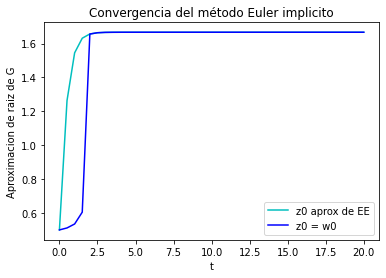

In [15]:
EI3BuenoGraf(1/2, f, [0,20], 1/2)

In [16]:
dg = lambda z, h: 6*h*z + 1-5*h

In [17]:
def newton (a, tol, f1, der, t, h):
    aproxn=[]
    errorn=[]
    b=a-f1(a)/der(a, h)
    while (abs(a-b)>tol):
        a=b
        b=a-f1(a)/der(a, h) 
        aproxn.append(a)
        errorn.append(a-b)
    return b

In [18]:
def EINewtonGraf(w0, f, I, h, der): #usando newton para aproximar G
    G = lambda z : (3*h*(z**2) + (1-5*h)*z - w[i])
    numpasos = m.ceil((I[1]-I[0])/h)
    T=np.linspace(I[0], I[1], numpasos+1)
    T1=[]
    for i in range(0, len(T)):
        T1.append(T[i])
    T1.append(20)
    w=np.zeros(len(T)+1)
    w1=np.zeros(len(T)+1)
    zi = np.zeros(len(T)+1)
    zmalo = np.zeros(len(T)+1)
    w[0]=w0
    w1[0]=w0
    zi[0]=w0 +h*f(T[0], w0)
    zmalo[0] = w0
    for i in range(0,len(T)):
        zi[i+1]=newton(zi[i], 10**-3, G, der, T[i], h)
        zmalo[i+1] = newton(zmalo[i], 10**-3, G, der, T[i], h)
        w[i+1] = zi[i+1]
        w1[i+1] = zmalo[i+1]
    print (w1)
    plot(T1, w, "c")
    plot(T1, w1, "b")
    title("Convergencia del método Euler implicito")
    legend(["z0 aprox de EE", "z0 = w0"])
    xlabel("t")
    ylabel("Aproximacion de raiz de G")
    return zi, T

[0.5 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]


<ipython-input-17-7750cecc71d1>:4: RuntimeWarning: divide by zero encountered in double_scalars
  b=a-f1(a)/der(a, h)
<ipython-input-18-caf5ae7117b9>:2: RuntimeWarning: invalid value encountered in double_scalars
  G = lambda z : (3*h*(z**2) + (1-5*h)*z - w[i])


(array([1.375     , 1.26376262, 1.54523127, 1.63143899, 1.65655785,
        1.66377485, 1.66584014, 1.66643064, 1.66659924, 1.6666474 ,
        1.66666116, 1.66666509, 1.66666622, 1.66666654, 1.66666663,
        1.66666666, 1.66666666, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ]))

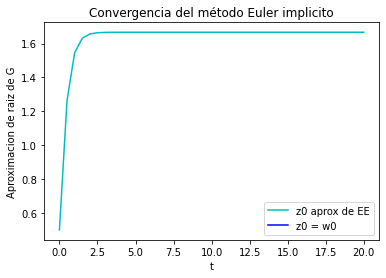

In [19]:
EINewtonGraf(1/2, f, [0,20], 1/2, dg)

No jala con newton si tomas la aproximación inicial como w0 en vez de la dada por EE porque la derivada de G se hace cero en z = w0 = 1/2. Por lo tanto no puedes empezar con eso, el método converge bien con z0 = aprox de EE

[0.5        1.         1.33333333 1.51037629 1.59551685 1.63470408
 1.65239317 1.66030942 1.66383856 1.6654092  1.66610785 1.66641832
 1.66655629 1.66661761 1.66664486 1.66665698 1.66666236 1.66666475
 1.66666582 1.66666629 1.6666665  1.66666659 1.66666663 1.66666665
 1.66666666 1.66666666 1.66666667 1.66666667 1.66666667 1.66666667
 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667
 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667
 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667
 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667
 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667
 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667
 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667
 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667
 1.66666667 1.66666667 1.66666667 1.66666667]


(array([0.9375    , 1.        , 1.33333333, 1.51037629, 1.59551685,
        1.63470408, 1.65239317, 1.66030942, 1.66383856, 1.6654092 ,
        1.66610785, 1.66641832, 1.66655629, 1.66661761, 1.66664486,
        1.66665698, 1.66666236, 1.66666475, 1.66666582, 1.66666629,
        1.6666665 , 1.66666659, 1.66666663, 1.66666665, 1.66666666,
        1.66666666, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66

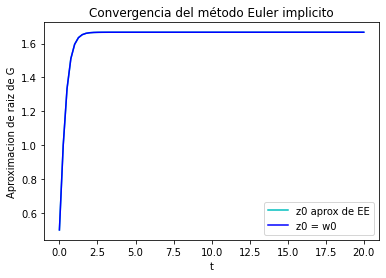

In [20]:
EINewtonGraf(1/2, f, [0,20], 1/4, dg)

[ 0.5        -0.11506929 -0.29626915 -0.32713689 -0.33230006 -0.33316148
 -0.3333047  -0.33332856 -0.33333254 -0.3333332  -0.33333331 -0.33333333
 -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333
 -0.33333333 -0.33333333 -0.33333333 -0.33333333]


(array([2.25      , 1.44840267, 1.62960248, 1.66047023, 1.66563339,
        1.66649481, 1.66663803, 1.66666189, 1.66666587, 1.66666653,
        1.66666664, 1.66666666, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]))

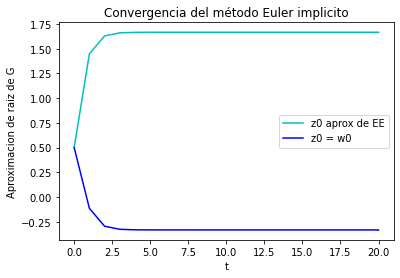

In [21]:
EINewtonGraf(1/2, f, [0,20], 1, dg)